In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [2]:
import plotly.express as px
import pandas as pd
import numpy as np

coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEPP/input_files/distan_lat42.77lon-1.647p3R12Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [3]:
import pandas as pd
import numpy as np

station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEPP/input_files/LEPP2018.csv",
                          usecols =["time","wxcodes_o"],
                          parse_dates=["time"]).dropna().set_index("time")

pd.options.display.max_rows = 999
print("Weather frequencies\n")
station["wxcodes_o"].value_counts(normalize=True).map(lambda n: '{:.2%}'.format(n))

Weather frequencies



M                 85.30%
-RA                5.22%
BR                 1.67%
FG                 1.38%
RA                 0.97%
BCFG               0.61%
-RA BR             0.36%
VCFG               0.32%
BR BCFG            0.31%
FZFG               0.27%
VCTS               0.25%
TS                 0.24%
RA BR              0.23%
-SHRA              0.23%
-TSRA              0.21%
-SN                0.21%
-DZ                0.20%
-UP                0.20%
SHRA               0.18%
SN                 0.16%
TSRA               0.10%
VCSH               0.07%
-DZ BR             0.07%
BCFG BR            0.07%
TS SHRA            0.06%
+RA                0.06%
-SNRA              0.06%
UP                 0.06%
TS -SHRA           0.05%
RASN               0.05%
SN FZFG            0.05%
+SHRA              0.04%
BR -RA             0.04%
-RA FG             0.04%
BR VCFG            0.03%
-SN FZFG           0.03%
-FZUP BR           0.03%
VCTS -SHRA         0.03%
DZ                 0.03%
-UP BR             0.03%


In [4]:
#label ra/dz

station["prec_l"] = "No RA/DZ"
mask = station['wxcodes_o'].str.contains("RA")
station.loc[mask,["prec_l"]] = "RA/DZ"
mask = station['wxcodes_o'].str.contains("DZ")
station.loc[mask,["prec_l"]] = "RA/DZ"

print(station.sample(50))
print("*****************************")
station["prec_l"].value_counts(normalize=True).transform(lambda x: '{:,.0%}'.format(x))

                    wxcodes_o    prec_l
time                                   
2018-02-17 13:30:00         M  No RA/DZ
2018-02-19 06:00:00         M  No RA/DZ
2018-03-06 12:30:00         M  No RA/DZ
2018-08-15 00:30:00         M  No RA/DZ
2018-01-03 10:30:00         M  No RA/DZ
2018-08-15 17:30:00         M  No RA/DZ
2018-09-21 14:30:00         M  No RA/DZ
2018-12-07 22:00:00         M  No RA/DZ
2018-09-09 09:00:00         M  No RA/DZ
2018-06-27 14:00:00         M  No RA/DZ
2018-01-02 18:30:00         M  No RA/DZ
2018-07-02 23:30:00         M  No RA/DZ
2018-12-16 01:00:00         M  No RA/DZ
2018-03-21 16:30:00         M  No RA/DZ
2018-01-25 01:30:00   BR BCFG  No RA/DZ
2018-06-22 03:30:00         M  No RA/DZ
2018-04-18 07:00:00         M  No RA/DZ
2018-12-12 05:30:00         M  No RA/DZ
2018-03-12 21:00:00         M  No RA/DZ
2018-10-19 20:30:00         M  No RA/DZ
2018-04-20 14:00:00         M  No RA/DZ
2018-04-22 15:30:00         M  No RA/DZ
2018-04-11 09:00:00       -RA     RA/DZ


No RA/DZ    91%
RA/DZ        9%
Name: prec_l, dtype: object

**Load model**

In [5]:
#Forecast d
#Load
#Load

model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEPP/input_files/lat42.77lon-1.647p3R12KmD1.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")

model1k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape2,cin2,cfh2,cfl2,cfm2,cft2,HGT5002,HGT8502,T5002,T8502
time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00,212.810684,0.0,1204.263184,2.763654,9.542564,102839.890625,281.275116,0.947388,22412.476562,3.646313,...,0.00,0.000469,0.00000,0.468750,0.093750,0.468750,5607.215820,1578.078003,252.732269,275.716339
2018-01-02 01:00:00,219.902222,0.0,1239.573364,2.314501,3.172857,102786.210938,281.294525,0.942502,24212.171875,3.307739,...,0.00,-0.003242,0.00000,0.445312,0.054688,0.445312,5612.247070,1574.463013,253.178864,275.794250
2018-01-02 02:00:00,207.281235,0.0,1272.054932,2.600275,3.666056,102732.492188,280.760559,0.957805,16212.355469,1.134692,...,0.00,0.003242,0.00000,0.585938,0.484375,0.585938,5611.367188,1570.259033,253.765778,275.807709
2018-01-02 03:00:00,192.515350,0.0,1294.618164,2.184818,3.098562,102700.179688,280.855927,0.977439,16412.923828,0.462329,...,0.00,-0.003906,0.34375,0.640625,0.585938,0.640625,5613.012207,1569.241943,253.932220,276.248291
2018-01-02 04:00:00,191.211334,0.0,1286.428467,3.427353,4.461230,102694.937500,281.143433,0.951643,24214.121094,2.390747,...,1.95,-9.202851,0.00000,0.266460,0.289062,0.289062,5614.570801,1565.439941,254.208084,275.869568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01 19:00:00,344.859467,0.0,1728.522583,7.440048,11.918997,103544.250000,278.996826,0.968763,24035.839844,11.358910,...,0.00,0.001641,0.00000,0.156830,0.000000,0.156830,5743.180176,1633.011963,255.708374,282.949585
2019-01-01 20:00:00,345.285889,0.0,1709.658203,7.653408,12.149794,103542.710938,278.911560,0.955455,24037.287109,13.632413,...,0.00,-0.003359,0.00000,0.028191,0.000000,0.028191,5742.202148,1632.599976,255.604370,282.798309
2019-01-01 21:00:00,344.544983,0.0,1704.850708,7.664435,12.332341,103549.656250,278.855560,0.945516,24037.503906,15.266365,...,0.00,-0.001055,0.00000,0.000000,0.000000,0.000000,5741.512207,1633.116943,255.559067,282.708557


In [6]:
#concat station file versus meteorological model file same time
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["wxcodes_o"]).dropna()
df_all1k.sample(20)

,prec_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape2,cin2,cfh2,cfl2,cfm2,cft2,HGT5002,HGT8502,T5002,T8502
time,,,,,,,,,,,,,,,,,,,,,
2018-01-12 07:00:00,No RA/DZ,343.456604,0.0,735.251709,4.577841,10.411003,102430.109375,277.345612,0.978620,24215.583984,...,1.480000,-0.307148,0.000000,0.425535,0.000000,0.425535,5502.648926,1522.442017,246.450546,273.494141
2018-07-20 03:00:00,No RA/DZ,342.769897,0.0,2594.404053,2.653025,6.328405,101633.210938,289.792023,0.993977,24213.423828,...,352.200012,-70.199608,0.000000,0.525309,0.000000,0.525309,5724.901855,1523.177979,261.209564,287.412079
2018-02-19 20:00:00,RA/DZ,336.777679,0.0,1157.996826,6.678351,10.925899,101931.656250,281.667511,0.926912,15015.704102,...,10.070000,-1.258086,0.187500,0.437500,0.078125,0.437500,5538.657227,1497.775024,253.374069,275.154388
2018-08-07 12:00:00,No RA/DZ,302.524170,0.0,3087.661133,3.185897,2.418350,101215.023438,300.270142,0.639450,24214.398438,...,2105.899902,-15.583125,0.200000,0.000000,0.000000,0.200000,5764.734863,1519.015015,260.959381,292.136566
2018-03-17 18:00:00,No RA/DZ,299.392365,0.0,501.451538,3.038658,5.548211,100015.437500,279.614655,0.796677,24213.964844,...,122.500000,-4.554375,0.000000,0.000000,0.062500,0.062500,5289.202148,1314.506958,242.707077,273.358917
2018-03-16 23:00:00,No RA/DZ,193.315155,0.0,536.865601,4.472764,5.432578,100462.257812,278.655426,0.872899,24214.505859,...,6.700000,-20.222813,0.062500,0.312500,0.218750,0.312500,5330.571777,1355.139038,243.671326,273.484955
2018-01-16 20:00:00,No RA/DZ,201.003418,0.0,1498.385254,1.794983,11.675064,102462.796875,279.799255,0.996352,24213.912109,...,2.510000,-2.999500,0.000000,0.400000,0.000000,0.400000,5661.498047,1547.376953,258.232147,276.289642
2018-05-15 04:00:00,No RA/DZ,320.570038,0.0,1216.441895,5.571921,11.148420,102109.039062,281.185760,0.908888,24212.552734,...,6.510000,-0.059625,0.015625,0.700000,0.000000,0.700000,5613.158203,1510.301025,255.357498,275.130585
2018-06-08 23:00:00,No RA/DZ,144.431534,0.0,2403.681396,1.618934,6.358708,101189.992188,286.804321,0.983328,24214.628906,...,136.600006,-62.855000,0.000000,0.000000,0.000000,0.000000,5653.516113,1479.954956,260.590210,286.216919


**Scatter plot significant meteorological variables and prec_l**

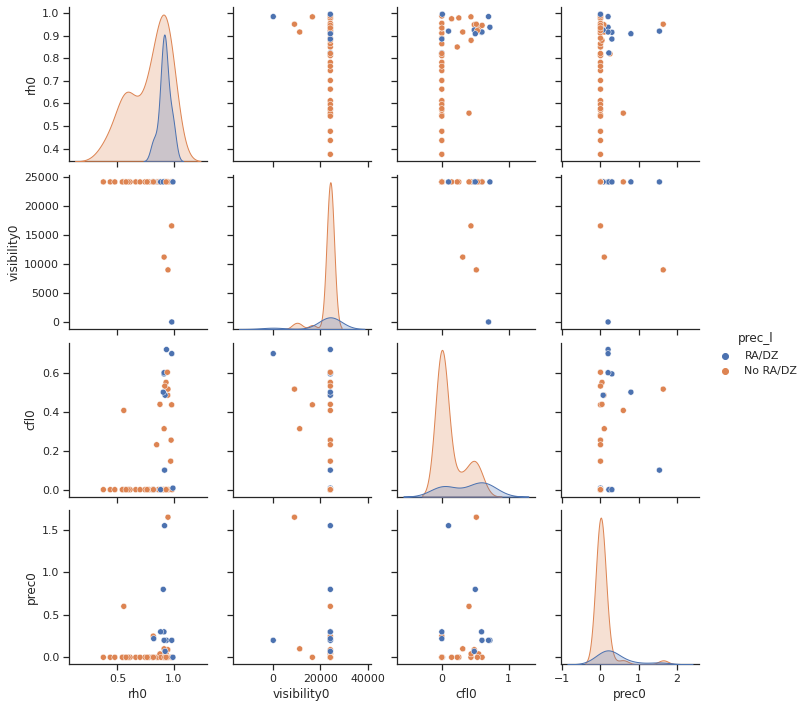

In [7]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df_all1k[["prec_l","rh0","visibility0","cfl0","prec0"]].sample(50), hue="prec_l");

**Scatter plot 3 PCA variables and prec_l**

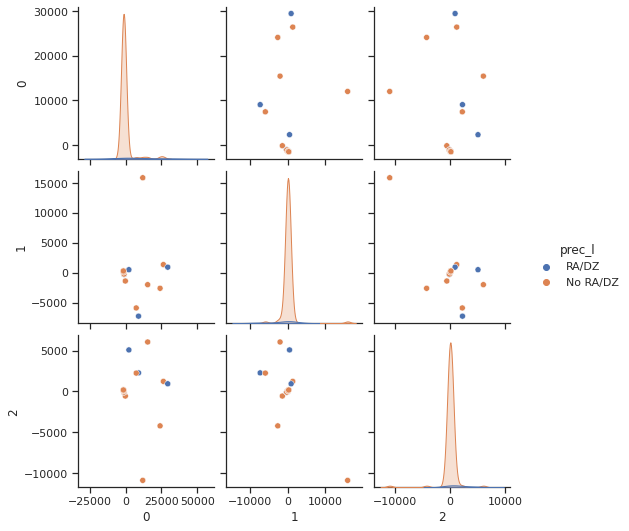

In [8]:
from sklearn.decomposition import PCA

df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all1k.iloc[:,1:]),
                                                        index =df_all1k.index)
df_pca["prec_l"] = df_all1k.prec_l
sns.pairplot(df_pca.sample(100), hue="prec_l");

**Meteorological model score Heidke Skill Score (HSS)**

In [9]:
from sklearn.metrics import classification_report

# HSS point 0
print("HSS point 0")
y_pred = np.asarray(["RA/DZ" if c>0 else "No RA/DZ" for c in df_all1k.prec0])
concat = pd.DataFrame({"y_pred":y_pred, "prec_l":df_all1k.prec_l})
cm = pd.crosstab(concat.prec_l,concat.y_pred ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met0 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met0,2))

print("\nQuality report Meteorological model point 0")
print(pd.DataFrame(classification_report(concat.prec_l, concat.y_pred,output_dict=True)).T)

# HSS point 1
print("\nHSS point 1")
y_pred = np.asarray(["RA/DZ" if c>0 else "No RA/DZ" for c in df_all1k.prec1])
concat = pd.DataFrame({"y_pred":y_pred, "prec_l":df_all1k.prec_l})
cm = pd.crosstab(concat.prec_l,concat.y_pred ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met1 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met1,2))

print("\nQuality report Meteorological model point 1")
print(pd.DataFrame(classification_report(concat.prec_l, concat.y_pred,output_dict=True)).T)

HSS point 0
y_pred    No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      5951   2004  7955
RA/DZ          157    530   687
All           6108   2534  8642
Heidke Skill Score: 0.23

Quality report Meteorological model point 0
              precision    recall  f1-score      support
No RA/DZ       0.974296  0.748083  0.846334  7955.000000
RA/DZ          0.209155  0.771470  0.329090   687.000000
accuracy       0.749942  0.749942  0.749942     0.749942
macro avg      0.591726  0.759777  0.587712  8642.000000
weighted avg   0.913471  0.749942  0.805216  8642.000000

HSS point 1
y_pred    No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      6111   1844  7955
RA/DZ          169    518   687
All           6280   2362  8642
Heidke Skill Score: 0.25

Quality report Meteorological model point 1
              precision    recall  f1-score      support
No RA/DZ       0.973089  0.768196  0.858588  7955.000000
RA/DZ          0.219306  0.754003  0.339784   687.000000
ac

**Test association between observed variable and machine learning forecast (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [10]:
from scipy.stats import chi2_contingency

#only cm point 1 similar point 0

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test association between two variables
alpha = 0.01
print('\np-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")


p-value: 2.921684132871065e-190
Significance level: 0.01
Degres of of freedom:  1
Stadistic 865.6206815705227
Reject H0,There is an association between machine learning forecast and observed values


In [ ]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)


100%|██████████| 29/29 [01:10<00:00,  2.44s/it]


In [ ]:
models

**ML LGBMClassifier**

In [ ]:
# variables X
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0',
       ...
       'cfm3', 'cft3', 'HGT5003', 'HGT8503', 'T5003', 'T8503', 'hour', 'month',
       'dayofyear', 'weekofyear'],
      dtype='object', length=104)


Confusion matrix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      1510     71  1581
RA/DZ           54     94   148
All           1564    165  1729
Heidke Skill Score: 0.56

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.965473  0.955092  0.960254  1581.000000
RA/DZ          0.569697  0.635135  0.600639   148.000000
accuracy       0.927704  0.927704  0.927704     0.927704
macro avg      0.767585  0.795113  0.780447  1729.000000
weighted avg   0.931595  0.927704  0.929472  1729.000000

Confusion matrix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      1500     74  1574
RA/DZ           62     93   155
All           1562    167  1729
Heidke Skill Score: 0.53

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.960307  0.952986  0.956633  1574.000000
RA/DZ          0.556886 

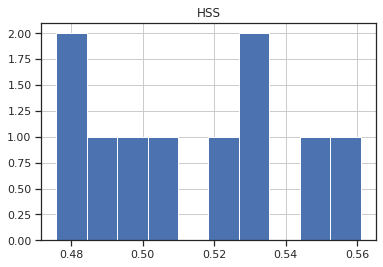

In [11]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed(1)
np.random.seed(1)
HSS_ml = []

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #ml model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  #ml_model = BernoulliNB().fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion matrix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_ml.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_ml[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000

print(pd.DataFrame(HSS_ml,columns=["HSS"]).describe())

sta, p = shapiro(HSS_ml)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_ml,columns=["HSS"]).hist();


**T test (1sample) compare machine learning HSS in a sample (n=10) versus meteorological model HSS at point 0 (0.23) and at point 1 (0.25). the alternative hypothesis is: the mean of HSS of the underlying distribution of the sample is greater than the given population HSS from meteorological model (popmean). Significance level (alpha) = 0.01**

In [15]:
import scipy.stats as stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(HSS_ml, popmean=0.27, alternative="greater")

print("\nalpha: ",alpha)
print("\nHSS list from machine learning test:",np.round(HSS_ml,2))
print("\np_value point 0:",p_value0)

if p_value0 < alpha:    
    print("\nwe are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0")
    print("\nwe are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0")
else:
    print("\nwe are accepting null hypothesis:  H0 HSS mean machine learning = HSS meteorological model point 0")





alpha:  0.01

HSS list from machine learning test: [0.56 0.53 0.53 0.5  0.48 0.48 0.53 0.55 0.49 0.5 ]

p_value point 0: 4.1216400083707936e-10

we are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0

we are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0


**Add time features**

In [16]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.isocalendar().week.astype(int)

In [ ]:

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

In [ ]:
# variables X
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0',
       ...
       'cfm3', 'cft3', 'HGT5003', 'HGT8503', 'T5003', 'T8503', 'hour', 'month',
       'dayofyear', 'weekofyear'],
      dtype='object', length=104)

**LGBMClassifier with time variables**


Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      1512     69  1581
RA/DZ           55     93   148
All           1567    162  1729
Heidke Skill Score: 0.56

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.964901  0.956357  0.960610  1581.000000
RA/DZ          0.574074  0.628378  0.600000   148.000000
accuracy       0.928282  0.928282  0.928282     0.928282
macro avg      0.769488  0.792368  0.780305  1729.000000
weighted avg   0.931447  0.928282  0.929742  1729.000000

Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      1514     60  1574
RA/DZ           59     96   155
All           1573    156  1729
Heidke Skill Score: 0.58

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.962492  0.961881  0.962186  1574.000000
RA/DZ          0.615385  0

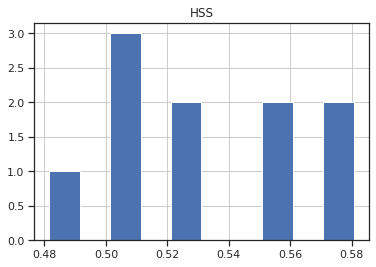

In [14]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_t = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_t.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_t[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_t,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_t)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_t,columns=["HSS"]).hist();


**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [17]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_ml, HSS_t, alternative="less")

print("\nHSS without time variables:", np.round(HSS_ml,3))
print("\nHSS with time variables:", np.round(HSS_t,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")


HSS without time variables: [0.561 0.534 0.53  0.503 0.482 0.476 0.526 0.548 0.486 0.497]

HSS with time variables: [0.561 0.58  0.581 0.482 0.524 0.506 0.555 0.511 0.511 0.525]

alpha:  0.01

p_value point:  0.03428119272960586

we are accepting null hypothesis:  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables


In [18]:
feature_importances = ml_model.feature_importances_
total_sum = sum(feature_importances)
feature_importances_perc = [(importance/total_sum)*100 for importance in feature_importances]
# Print the feature importances as a percentage of total feature importance

for name, importance in zip(X.columns, feature_importances_perc):
    print(f"{name}: {importance:.1f}%")
     

dir0: 2.1%
snow_prec0: 0.0%
snowlevel0: 0.9%
mod0: 1.3%
wind_gust0: 1.0%
mslp0: 1.5%
temp0: 1.0%
rh0: 1.2%
visibility0: 2.0%
lhflx0: 0.9%
lwflx0: 1.2%
conv_prec0: 0.9%
prec0: 1.7%
swflx0: 0.8%
shflx0: 1.4%
cape0: 1.0%
cin0: 1.8%
cfh0: 2.1%
cfl0: 1.5%
cfm0: 1.2%
cft0: 0.9%
HGT5000: 1.3%
HGT8500: 0.9%
T5000: 1.2%
T8500: 0.7%
dir1: 2.6%
snow_prec1: 0.2%
snowlevel1: 1.0%
mod1: 0.9%
wind_gust1: 1.4%
mslp1: 1.1%
temp1: 1.1%
rh1: 1.7%
visibility1: 1.8%
lhflx1: 1.8%
lwflx1: 1.3%
conv_prec1: 0.5%
prec1: 1.4%
swflx1: 0.6%
shflx1: 1.2%
cape1: 1.6%
cin1: 0.9%
cfh1: 1.1%
cfl1: 1.6%
cfm1: 2.1%
cft1: 1.1%
HGT5001: 0.8%
HGT8501: 0.8%
T5001: 1.4%
T8501: 0.9%
dir2: 1.9%
snow_prec2: 0.0%
snowlevel2: 0.7%
mod2: 1.6%
wind_gust2: 1.5%
mslp2: 1.2%
temp2: 1.0%
rh2: 1.4%
visibility2: 1.9%
lhflx2: 1.3%
lwflx2: 1.2%
conv_prec2: 1.2%
prec2: 1.5%
swflx2: 0.8%
shflx2: 1.9%
cape2: 1.7%
cin2: 2.1%
cfh2: 0.8%
cfl2: 1.2%
cfm2: 1.7%
cft2: 1.2%
HGT5002: 0.7%
HGT8502: 0.9%
T5002: 1.0%
T8502: 0.9%
hour: 2.3%
month: 1.0%
da

****

**Save Machine learning model**

In [19]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("prec_LEPP_d1.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


In [ ]:
import sklearn
print(sklearn.__version__)
print(pd.__version__)

1.2.2
1.4.4


**ExtraTreesClassifier too big to be upload at github!!**


Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      1516     65  1581
RA/DZ           49     99   148
All           1565    164  1729
Heidke Skill Score: 0.6

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.968690  0.958887  0.963764  1581.000000
RA/DZ          0.603659  0.668919  0.634615   148.000000
accuracy       0.934066  0.934066  0.934066     0.934066
macro avg      0.786174  0.813903  0.799189  1729.000000
weighted avg   0.937444  0.934066  0.935589  1729.000000

Confusion marix  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      1523     60  1583
RA/DZ           47     99   146
All           1570    159  1729
Heidke Skill Score: 0.62

Quality report (Machine Learning)

              precision    recall  f1-score      support
No RA/DZ       0.970064  0.962097  0.966064  1583.000000
RA/DZ          0.622642  0.

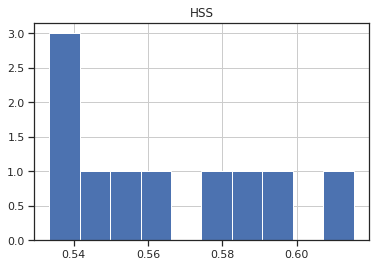

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_plus = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = ExtraTreesClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_plus.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_plus[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_plus,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_plus)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_plus,columns=["HSS"]).hist();

**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [21]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_t, HSS_plus, alternative="less")

print("\nHSS with LGBMClassifier:", np.round(HSS_t,3))
print("\nHSS with ExtraTreesClassifier:", np.round(HSS_plus,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier")
else:
    print("\nwe are accepting null hypothesis:  H0: LGBMClassifier = HSS mean ExtraTreesClassifier")


HSS with LGBMClassifier: [0.561 0.58  0.581 0.482 0.524 0.506 0.555 0.511 0.511 0.525]

HSS with ExtraTreesClassifier: [0.598 0.615 0.544 0.533 0.559 0.586 0.558 0.581 0.538 0.534]

alpha:  0.01

p_value point:  0.008727545354433167

we are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier

we are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier
